In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/manue/Desktop/2019-Nov.csv', header = 'infer')
df['event_time'] = pd.to_datetime(df.event_time)

In [3]:
# keep only 1 row per session

unique_sessions = df.drop_duplicates(subset=['user_session'])

In [4]:
# number of sessions per hour

sessions_per_hour = pd.DataFrame(unique_sessions.groupby(by= unique_sessions.event_time.dt.hour, as_index= False)['event_type'].count()).reset_index()
sessions_per_hour.rename(columns={'index':'hour', 'event_type': 'sessions_per_hour'}, inplace=True)
sessions_per_hour

,hour,sessions_per_hour
0,0,7877
1,1,7290
2,2,8406
3,3,11916
4,4,17877
5,5,28928
6,6,40331
7,7,48471
8,8,53937
9,9,55709


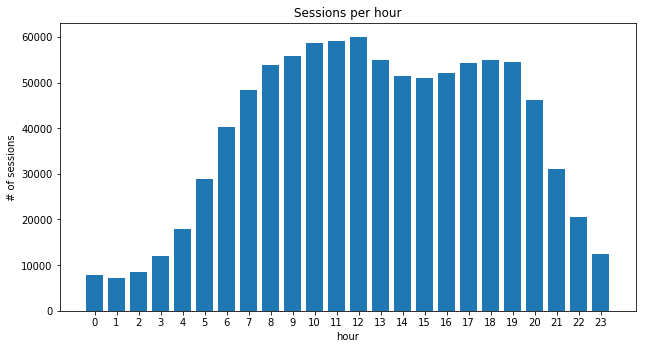

In [5]:
# plot it

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sessions_per_hour.hour, sessions_per_hour.sessions_per_hour)
fig.set_figheight(4)
fig.set_figwidth(8)
plt.title('Sessions per hour')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('hour')
plt.ylabel('# of sessions')
plt.show()

In [6]:
# number of sessions for each weekday

sessions_per_weekday = unique_sessions.groupby(unique_sessions.event_time.dt.weekday)['event_time'].count()

In [7]:
# weekdays count

unique_sessions2 = unique_sessions
unique_sessions2['event_time'] = unique_sessions2['event_time'].apply(lambda x: x.replace(hour = 0, minute=0, second=0))
unique_days = unique_sessions.drop_duplicates(subset = ['event_time'])
weekday_count = unique_days.groupby(unique_days.event_time.dt.weekday)['event_type'].count()

C:\Users\manue\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
# avg sessions per hour for each weekday

avg_sessions = sessions_per_weekday / weekday_count / 24

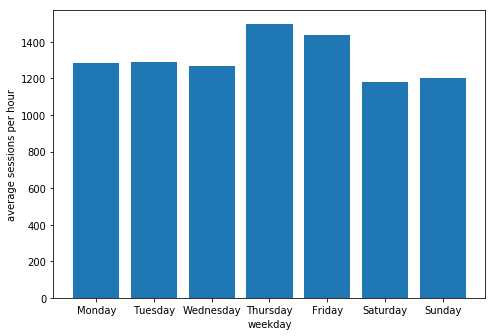

In [12]:
# plot it

WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(WEEKDAYS, avg_sessions)
plt.xlabel('weekday')
plt.ylabel('average sessions per hour')
plt.show()

C:\Users\manue\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


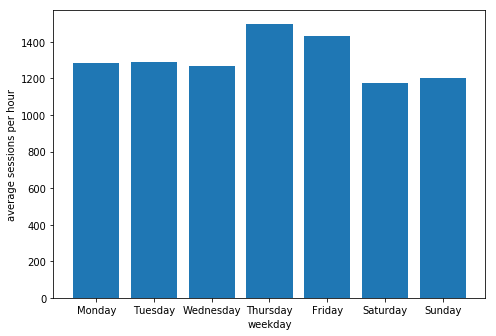

In [13]:
# average number of sessions per hour for each weekday

WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sessions_per_weekday = np.asarray(unique_sessions.groupby(unique_sessions.event_time.dt.weekday)['event_type'].count())


def get_weekday_count(weekday,df):
    """ takes a weekday and a df, returns the number of times that weekday appears in the df
    ------------------------
    INPUTS:
    
    weekday : int from 0 to 6, where 0 is Monday and 6 is Sunday
    df      : pandas DataFrame
    
    OUTPUT:
    
    int
    
    """
    df2 = df.loc[df.event_time.dt.weekday == weekday]
    df2['event_time'] = df['event_time'].apply(lambda x: x.replace(hour=0, minute=0, second=0))
    return len(df2['event_time'].unique())


def hourly_avg_per_weekday(sessions_per_day):
    """ takes a np array with numbers of sessions per weekday, applies weekday_count funct and returns the hourly average of sessions per weekday
    ------------------------
    INPUTS:
    
    sessions_per_day: 2D np.array of size 7
    
    OUTPUT:
    
    np.array of size 7
    
    """
    for i in range (7):
        sessions_per_weekday[i] = sessions_per_weekday[i] / get_weekday_count(i,unique_sessions) / 24
    return sessions_per_weekday

hourly_avg = hourly_avg_per_weekday(sessions_per_weekday)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(WEEKDAYS, hourly_avg)
plt.xlabel('weekday')
plt.ylabel('average sessions per hour')
plt.show()